In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/tripadvisor_hotel_reviews.csv')

For opening Dataset locally, uncomment the below line.

In [5]:
data1 = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [6]:
data1.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
Response = []
for row in data1['Rating']:
  if row < 3:
    Response.append('Not happy')
  elif row == 3:
    Response.append('Neutral')
  else:
    Response.append('Happy')

In [9]:
data1['Response'] = Response

In [10]:
data1.head()

,Review,Rating,Response
0,nice hotel expensive parking got good deal sta...,4,Happy
1,ok nothing special charge diamond member hilto...,2,Not happy
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,Happy
4,"great stay great stay, went seahawk game aweso...",5,Happy


In [ ]:
#Creating dictionary
dict={'Happy':0,'Neutral':1,'Not happy':2}
data1['Response_type']=data1['Response'].map(dict)

In [ ]:
data1.sample(15)

,Review,Rating,Response,Response_type
5340,perfect location berlin long weekend just retu...,5,Happy,0
18104,"good location stayed 2 nights, room clean comf...",3,Neutral,1
16705,"excellent, wife 21 month old stayed europa 3 n...",5,Happy,0
6717,"dominican trip 4 writing reviewing dr 4 times,...",3,Neutral,1
9895,family birthday family brother 50th birthday p...,4,Happy,0
14961,definitely stay best things hotel stylish room...,5,Happy,0
1756,bargain stay sf car motor inn good choice car ...,3,Neutral,1
16245,good service great location fantastic pool sup...,5,Happy,0
18239,good value basic hotel waikiki aqua palms offe...,3,Neutral,1
15773,"modern little young stayed new year, modern st...",4,Happy,0


In [ ]:
count = data1['Rating'].value_counts()
print(count)

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

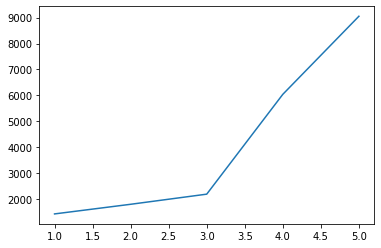

In [ ]:
count.plot()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(data1)):
  review = re.sub('[^a-zA-Z]', ' ', data1['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
#Function for removing special characters
def remove_special_chars(text):
  for remove in map(lambda r: re.compile(re.escape(r)), [',', ':', "=", "&", ";", '%', '$','@', '%', '^', '*', '(',')', '{', '}','[', ']', '|', '/', '\\', '>', '<', '-','!', '?', '.', "'",' — ', ' — — ', '#',"’ " ,'\"']):
    text.replace(remove, '', inplace=True)
  return text

#Function for removing tags
def remove_tags(text):
  return re.compile( r" <[^>]+> ").sub(" ", text)

#Function for removing numbers
def remove_num(text):
  return ''.join(re.sub(r'([0–9+])',' ' ,text))

In [ ]:
final_data=data1.copy( )

In [ ]:
final_data.Review=final_data.Review.apply(lambda x : remove_tags(x))

In [ ]:
final_data.Review=final_data.Review.apply(lambda x : remove_num(x))

In [ ]:
remove_special_chars(final_data.Review)

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4 experience hotel monaco seatt...
3        unique great stay wonderful time hotel monaco ...
4        great stay great stay went seahawk game awesom...
                               ...                        
20486    best kept secret 3rd time staying charm not 5s...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside desk staff n...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking ca nt believe excellent ratings...
Name: Review, Length: 20491, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
tfidf = TfidfVectorizer(max_features=40000, ngram_range=(1,5), analyzer='char')

In [ ]:
x = tfidf.fit_transform(final_data['Review'])
y = data1['Rating']
z = data1['Response']
x_train, x_test, y_train, y_test,z_train, z_test = train_test_split(x,y,z,test_size = 0.2, random_state = 0)

 **Linear** **SVC**

In [ ]:
clf =LinearSVC(C = 1,class_weight='balanced')
clf.fit(x_train,z_train)
clf.score(x_test,z_test)

0.8526469870700171

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,z_train)
lr.score(x_test,z_test)

0.8511832154183947

**Decision** **Tree** **Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,z_train)
dt.score(x_test,z_test)

0.6994388875335448

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,z_train)
rf.score(x_test,z_test)

0.8040985606245425

**Naive** **Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,z_train)
nb.score(x_test,z_test)

0.7782385947792144

**HyperParameter Tunning Using GridSearchCV**

In [ ]:
model_params = {
    'svm': {
        'model': LinearSVC(),
        'params' : {
            'C': [1,10,20],
            
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}


In [ ]:
scores = []
best_estimators = {}
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, z_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.862677,{'C': 1}
1,random_forest,0.805332,{'n_estimators': 100}
2,logistic_regression,0.862555,{'C': 10}


In [ ]:
best_estimators['svm'].score(x_test,z_test)

0.8636252744571847

In [ ]:
best_estimators['logistic_regression'].score(x_test,z_test)

0.8621615028055624

**HyperParameter Tunning for Naive Bayes**

In [ ]:
import sklearn.metrics as metrics
hyper_classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
  sub_classifier=MultinomialNB(alpha=alpha)
  sub_classifier.fit(x_train,z_train)
  y_pred=sub_classifier.predict(x_test)
  score = metrics.accuracy_score(z_test, y_pred)
  if score>previous_score:
    hyper_classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

In [ ]:
y_pred = clf.predict(x_test)
print(y_pred)
print(classification_report(z_test, y_pred))

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(z_test, y_pred)

In [ ]:
sns.heatmap(cm, annot = True,cmap="Blues", fmt='.1f')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Deep** **Learning**

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=5000,filters='!”#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ')

In [ ]:
tokenizer.fit_on_texts(final_data["Review"])


In [ ]:
X = tokenizer.texts_to_sequences(final_data["Review"])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X= pad_sequences(X,maxlen=100,padding='post')
y= final_data['Response_type']

In [ ]:
X[500]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 24)

**Building single layer** **LSTM** **cell** **for** **training** 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=100))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test), )

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

def function(Review):
  vec = tfidf.transform([Review])  
  return "The user's review suggest that user is feeling "+ lr.predict(vec)
               

iface = gr.Interface(fn=function, inputs="text", outputs="text")
iface.launch(share=True)